In [5]:
%matplotlib inline
import pandas as pd
from datetime import datetime

In [6]:
df = pd.read_csv('/Users/sahiyo/PycharmProjects/Data/1962_2006_walmart_store_openings.csv',parse_dates=['date_super']).dropna()


/var/folders/pg/6j_pvh8d1c58ksk8np5cmthr0000gn/T/ipykernel_12455/531136962.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/Users/sahiyo/PycharmProjects/Data/1962_2006_walmart_store_openings.csv',parse_dates=['date_super']).dropna()


In [7]:
df_count = df.groupby('YEAR')[['storenum']].agg('count').rename(columns={'storenum':'store_count'})
df.head()

,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,1997-03-01,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,1996-03-01,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,2002-03-01,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,1993-03-01,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
5,10,7/1/68,1998-03-01,1.0,40,21,2020 SOUTH MUSKOGEE,Tahlequah,OK,74464,Supercenter,35.923658,-94.97185,7,1,1968


In [8]:
df = pd.merge(df,df_count,on='YEAR')

In [9]:
df = df.set_index(pd.DatetimeIndex(df['date_super']))

In [12]:
df = df[['date_super','store_count']]
df.drop_duplicates(subset='date_super',inplace=True)
df.head(10)

,date_super,store_count
date_super,,
1997-03-01,1997-03-01,1
1996-03-01,1996-03-01,1
2002-03-01,2002-03-01,1
1993-03-01,1993-03-01,1
1998-03-01,1998-03-01,5
1994-03-01,1994-03-01,5
2002-02-20,2002-02-20,5
2000-03-01,2000-03-01,5
1995-03-01,1995-03-01,4


In [13]:
# covering the range to a freaquency of 2 days

df_series = df.store_count
df_series = df_series.asfreq('2D')
df_series.tail()

date_super
2006-01-22     NaN
2006-01-24     NaN
2006-01-26     NaN
2006-01-28     NaN
2006-01-30    92.0
Freq: 2D, Name: store_count, dtype: float64

<Axes: xlabel='date_super'>

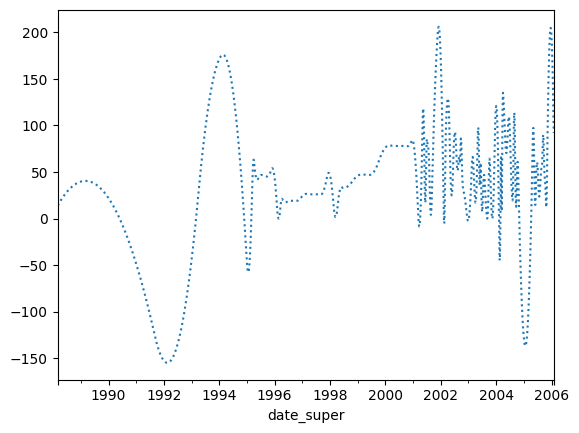

In [14]:
# interpolating missing values using linear method
df_series = df_series.interpolate(method='spline',order=2)
df_series.plot(style=[':'])

/var/folders/pg/6j_pvh8d1c58ksk8np5cmthr0000gn/T/ipykernel_12455/940024265.py:3: FutureWarning: 'BQ' is deprecated and will be removed in a future version, please use 'BQE' instead.
  df_series.resample("BQ").mean().plot(style=[':']) # Business annual
/var/folders/pg/6j_pvh8d1c58ksk8np5cmthr0000gn/T/ipykernel_12455/940024265.py:4: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  df_series.resample("BA").mean().plot(style=[':']) # Business annual


<Axes: xlabel='date_super'>

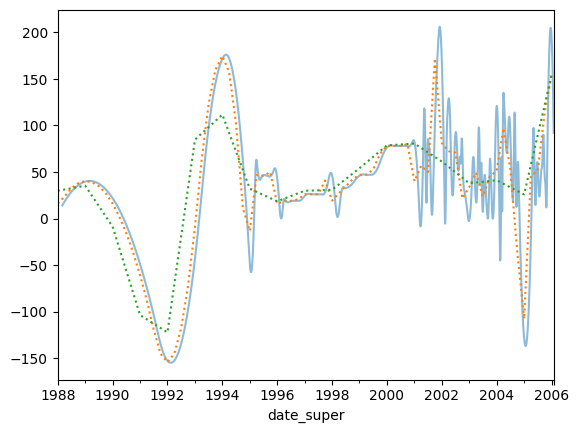

In [17]:
# Downsampling the plot
df_series.plot(alpha=0.5,style='-')
df_series.resample("BQ").mean().plot(style=[':']) # BQ stands Business Quarter
df_series.resample("BA").mean().plot(style=[':']) # BA stands Business Year